In [1]:
#    **** Week #1 ****

In [2]:
import numpy 
# SciPy  - signal processing, optimasation, statistics, higher order analysis


scikitlearn
"attributes" are the names of variables
"features" are the columns which include the data (eg the data for one attribute)
"obseravations" are the rows of data - all the attribute of one item (ID)
types of data: numeric or chategorical 
two types of super. learning techniques: classification and regression
   - deals with labelled data
types of unsuperv. learning techniques: dimension reduction, density estimation,
       market basket analysis, clustering
   - deals with unlabelled data


  Week 2

X: independent variables, causes, one or more, explanatory variables
Y: dependent variables, target, state, final goal
dependent values have to be continues, but the X can be either catag
  or numerical
Simple regression = one X => Y, linear or not linear
Multiple Regression => more than one indep variable => one Y, linear or not

**** Simple Linear Regression:
  2 variables, one dep, one indep (cont or cat)
 MSE (mean squared error) = 1/n summation ((pred.y - hist.y)^2)
 to minimize MSE:
     => slope = sum.((xi-xmean)(yi-ymean))/sum.(xi-xmean)^2
     => intercept = ymean - slope*xmean

Pros of linear regression: 
    very fast
    no parameter tuning
    easy to understand, and highly interpretable

*** Model Evaluation in Regression Models
  approaches: train and test on the same dataset
              train/test split
    train and test on the same dataset:
            calculating the accuracy of the model: Error = 1/n sum.abs(yi(actual)-yi(pred))
      - high "training accuracy" 
                    training accuracy is the % of correct predictions of the training set
                      may result in over-fitting, following noise
      - low "out-of-sample accuracy
               the % of correct predictions on the data the model has not seen   
   train/test split => mutually exclusive data sets
                    more accurate evaluation on out-of-sample accuracy, more useful in real world
                 => highly dependent on which dataets the data is trained and test
                  better out of sample prediction 
  k-fold cross-validation resolves most of issues with the above two approaches





  *** Evaluation Metrics in Regression Models
Error as before
MAE, MSE, RMSE (same units as y-units)
also RAE = relative absolute error (aka residual sum of squares) = sum.()

In [7]:
#  Lab 1.
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [11]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
print(len(df))
df.head()

1067


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
# summarize
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
# select only some variables

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


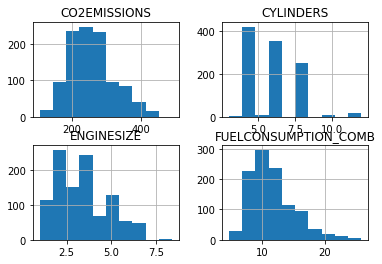

In [18]:
# plotted even smaller # of variables

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

# Q: why create viz?

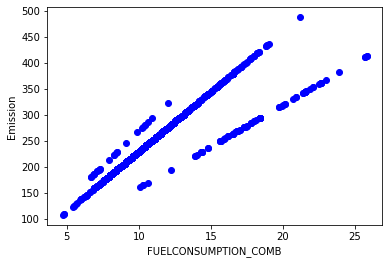

In [24]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

#Q: how did we define CO2EMISSINS? Is it default from the name?


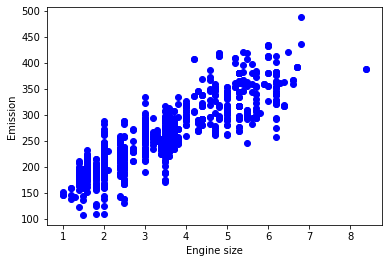

In [20]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

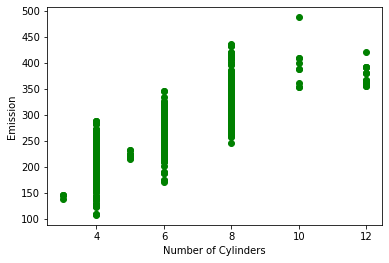

In [32]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
plt.xlabel("Number of Cylinders")
plt.ylabel("Emission")
plt.show()

In [35]:
# Creating train and test dataset using train/test split (80% for training)

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

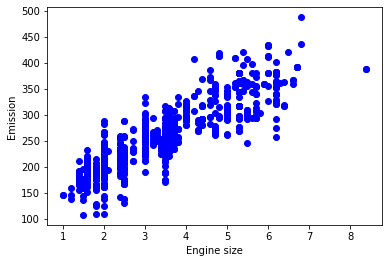

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [47]:
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr1.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

# Q: why np.asanyarray?

Coefficients:  [[39.17182999]]
Intercept:  [124.69445412]


Text(0, 0.5, 'Emission')

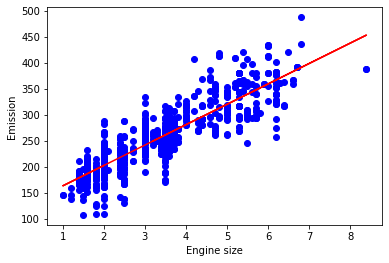

In [48]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#Q: what's [0][0]?

In [49]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr1.predict(test_x)   #test_y_hat is predicted y

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.36
Residual sum of squares (MSE): 862.88
R2-score: 0.70


In [ ]:
#   *** Multiple Linear Regression ****

In [56]:
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr2.fit (x, y)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[10.54266596  7.53848682  9.88168066]]
Intercept:  [62.72104997]


In [54]:
y_hat= regr2.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat, y))

Residual sum of squares: 522.99
Variance score: 0.86
R2-score: 0.85


In [63]:
# Practice

# from sklearn import linear_model 
cdf2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
msk = np.random.rand(len(df)) < 0.8
train = cdf2[msk]
test = cdf2[~msk]
regr3 = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr3.fit (x, y)
# The coefficients
print ('Coefficients: ', regr3.coef_)
print ('Intercept: ',regr3.intercept_)

Coefficients:  [[12.43684153  6.70293273  5.24465392  3.94350826]]
Intercept:  [68.8207332]


In [66]:
y_hat= regr3.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr3.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat, y))

Residual sum of squares: 585.78
Variance score: 0.86
R2-score: 0.83


In [ ]:
#   *** Polynomial regression ***

In [1]:
cdf3 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf3.head(9)

NameError: name 'df' is not defined

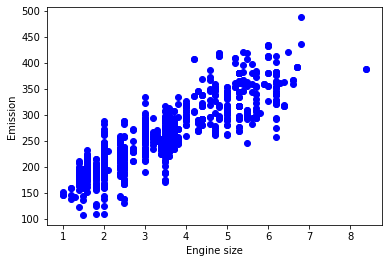

In [70]:
plt.scatter(cdf3.ENGINESIZE, cdf3.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [133]:
msk = np.random.rand(len(df)) < 0.8
train4 = cdf3[msk]
test4 = cdf3[~msk]
print(msk[:10])

ValueError: Item wrong length 55 instead of 1067.

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train4[['ENGINESIZE']])
train_y = np.asanyarray(train4[['CO2EMISSIONS']])

test_x = np.asanyarray(test4[['ENGINESIZE']])
test_y = np.asanyarray(test4[['CO2EMISSIONS']])
# print(train_x)
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)      #   ****
train_x_poly
# PlynomialFeatures() generates all polynomial combinations 
#       of the features with degree less than or equal to the specified
#   train_x_poly produces a matrix of each x data raised 
#       to the power of spec.degree 

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [81]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.77857618 -1.51082523]]
Intercept:  [106.58741829]


Text(0, 0.5, 'Emission')

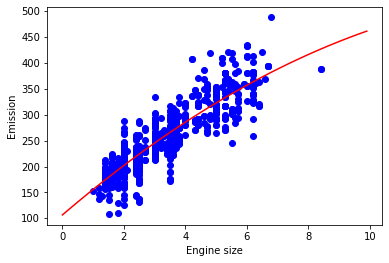

In [82]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
#   Q:  np.power?
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [84]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.69
Residual sum of squares (MSE): 1011.38
R2-score: 0.71


Coefficients:  [[ 0.         31.16518894  3.99608026 -0.46602986]]
Intercept:  [127.10095598]
Mean absolute error: 23.59
Residual sum of squares (MSE): 1004.39
R2-score: 0.71


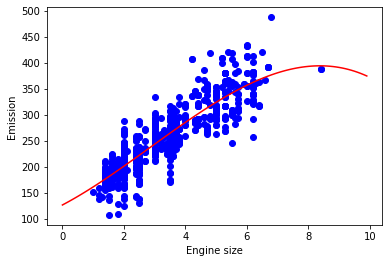

In [93]:
# Practice:

poly2 = PolynomialFeatures(degree=3)
train_x_poly2 = poly2.fit_transform(train_x)      #   ****
clf2 = linear_model.LinearRegression()
train_y_ = clf2.fit(train_x_poly2, train_y)
# The coefficients
print ('Coefficients: ', clf2.coef_)
print ('Intercept: ',clf2.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf2.intercept_[0]+ clf2.coef_[0][1]*XX+ clf2.coef_[0][2]*np.power(XX, 2)+ clf2.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
from sklearn.metrics import r2_score

test_x_poly2 = poly2.fit_transform(test_x)
test_y_2 = clf2.predict(test_x_poly2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_2 , test_y) )

In [95]:
#   *** Non-Linear Regression Analysis *** 

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

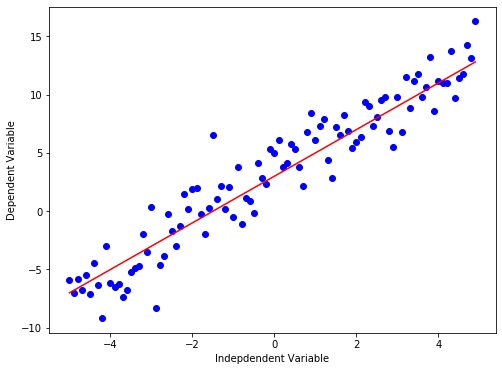

In [103]:
x = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
# Q: how does this noise work?
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)   #Q:?? how do we know it should be 2 or 20?
ydata = y + y_noise
plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

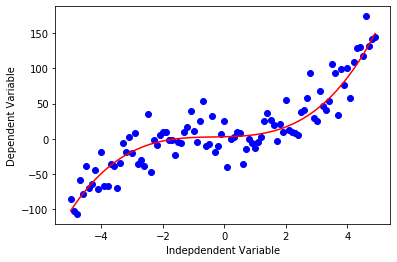

In [113]:
# Cubic 

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
# print(y_noise)
plt.show()

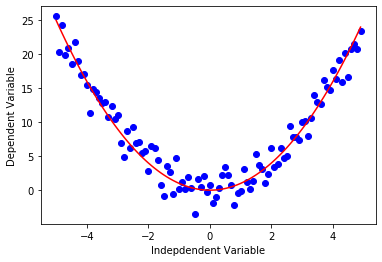

In [118]:
# Quadratic

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

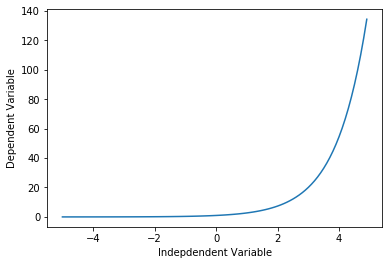

In [119]:
# Exponential 

X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\Users\dasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


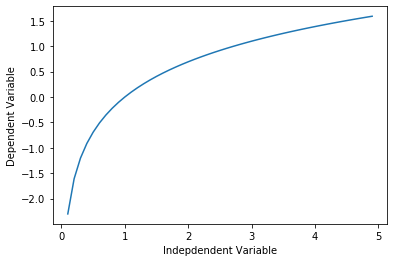

In [120]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Sigmoidal/Logistic

𝑌=𝑎+(𝑏/(1+𝑐^(𝑋−𝑑)))

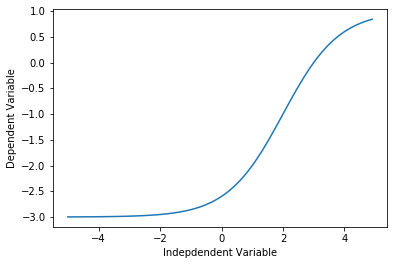

In [121]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [171]:
import numpy as np
import pandas as pd

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


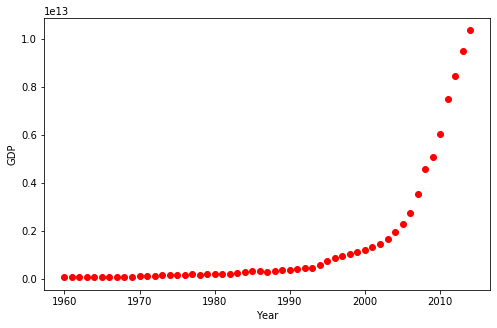

In [131]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
# x_data, y_data = df.Year, df.Value   #same as above  
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

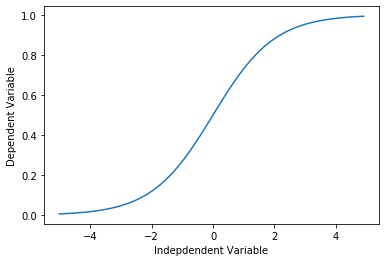

In [132]:
# logistic function 𝑌̂ =1/(1+𝑒^(𝛽1(𝑋−𝛽2)))
#   -beta1 controls steepness
#   -beta2 slides the curve on the xaxis

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [135]:
#Build regression model and initialize its parameters 

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

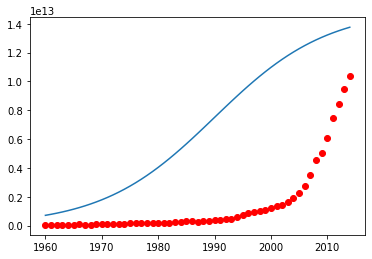

In [136]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

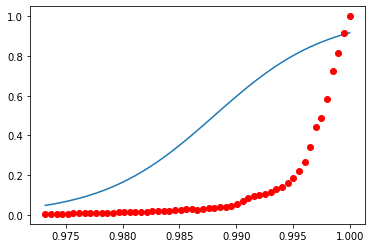

In [146]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
plt.plot(xdata, Y_pred)
plt.plot(xdata, ydata, 'ro')

In [151]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


In [153]:
print(pcov)

[[ 1.52271498e+03 -2.88118984e-04]
 [-2.88118984e-04  7.25961449e-09]]


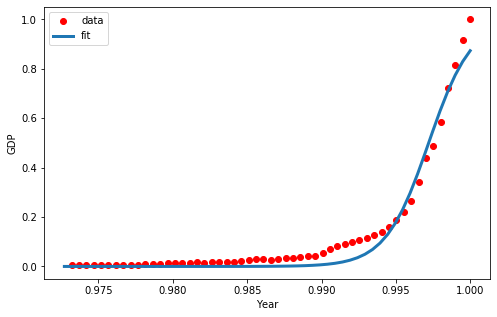

In [164]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)                          ### ******!!!!!
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [167]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y-ydata)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y-ydata) ** 2))
print("R2-score: %.2f" % r2_score(y, ydata) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97


In [209]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)
print(popt)
# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

[720.39445056   0.99717708]
Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.95
